In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Exercise 1

In [ ]:
# Letra a

total = np.array([3, 5, 4, 5])
maturas = np.array([0, 1, 3, 5])
x = np.array([12.5, 22.5, 32.5, 62.5])

In [ ]:
# Letra B

pobs = maturas/total

In [ ]:
# Letra C

beta0 = 1.1630
beta1 = 0.2669

p = np.exp(beta0 + beta1*(x - np.mean(x))) / (1 + np.exp(beta0 + beta1*(x - np.mean(x))))
p

array([0.01514237, 0.18153235, 0.7618774 , 0.99989589])

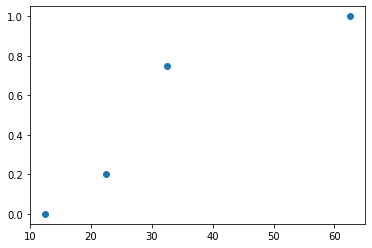

In [ ]:
# Letra D

plt.scatter(x, pobs)

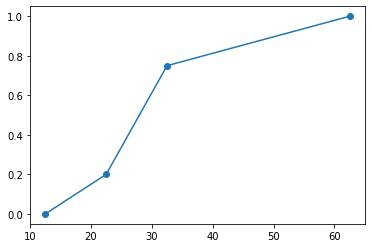

In [ ]:
# Letra E

plt.scatter(x, pobs)
plt.plot(x, pobs)
plt.show()

### Exercise 2

In [ ]:
# Letra A

alpha = 0.00001
beta = 3

comp = np.arange(40, 80, 1)
comp

array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73,
       74, 75, 76, 77, 78, 79])

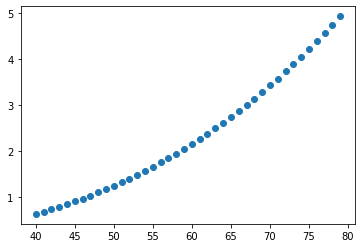

In [ ]:
# Letra B

p = alpha * comp**beta

plt.scatter(comp, p)
plt.show()

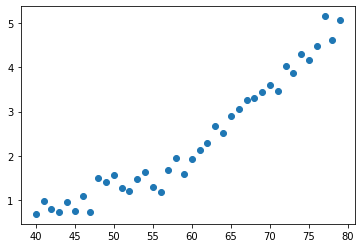

In [ ]:
# Letra C

erro = sp.stats.norm.rvs(0, 0.25, len(comp))

pr = p + erro

plt.scatter(comp, pr)
plt.show()

### Exercise 3

In [ ]:
# Letra A

log_comp = np.log(comp)
log_pr = np.log(pr)

df = pd.DataFrame({'log_pr':log_pr, 'log_comp':log_comp})

var_exp = df[['log_comp']]
var_exp = sm.add_constant(var_exp)
var_dep = df['log_pr']

model = sm.OLS(var_dep, var_exp).fit()
summary = model.summary()

In [ ]:
# Letra B

alpha_est = np.exp(model.params[0])
beta_est = model.params[1]

print(alpha_est, beta_est)

1.13272584049456e-05 2.9692572152749372


In [ ]:
# Letra C

p_pred = alpha_est * comp**beta_est
p_pred

array([0.64722159, 0.69645797, 0.74811692, 0.80225569, 0.85893149,
       0.91820149, 0.98012281, 1.04475254, 1.11214774, 1.1823654 ,
       1.25546252, 1.33149602, 1.41052282, 1.49259979, 1.57778375,
       1.66613152, 1.75769987, 1.85254554, 1.95072523, 2.05229563,
       2.15731339, 2.26583511, 2.3779174 , 2.49361681, 2.61298988,
       2.73609311, 2.86298299, 2.99371595, 3.12834844, 3.26693684,
       3.40953754, 3.55620688, 3.70700118, 3.86197675, 4.02118986,
       4.18469677, 4.3525537 , 4.52481685, 4.70154242, 4.88278656])

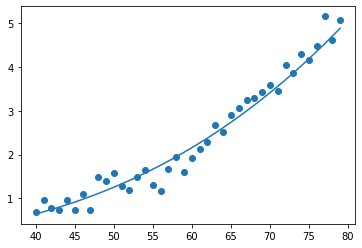

In [ ]:
# Letra D

plt.scatter(comp, pr)
plt.plot(comp, p_pred)
plt.show()